In [1]:
!pip install mlxtend

In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.simplefilter('ignore')

In [4]:
#my_movies data set
movies =pd.read_csv("my_movies.csv")

In [5]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
movies['Sixth Sense'].value_counts()

1    6
0    4
Name: Sixth Sense, dtype: int64

In [7]:
mov=pd.get_dummies(movies)
mov.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#Apriori algorithm

In [8]:
frequent_itemset = apriori(mov, min_support=0.1, use_colnames=True)
frequent_itemset

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, V3_Harry Potter1, V2_LOTR1, Si..."
1393,0.1,"(V4_Green Mile, V3_Harry Potter1, V2_LOTR1, Si..."
1394,0.1,"(V4_Green Mile, V3_Harry Potter1, V2_LOTR1, Si..."
1395,0.1,"(V4_Green Mile, V3_Harry Potter1, V2_LOTR1, LO..."


In [9]:
frequent_itemset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   1397 non-null   float64
 1   itemsets  1397 non-null   object 
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [10]:
rule = association_rules(frequent_itemset, metric="lift", min_threshold=1.0)
rule
rule.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32108,"(LOTR1, Green Mile, V5_LOTR2, Harry Potter1)","(Sixth Sense, LOTR2, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
52635,"(Sixth Sense, V1_Sixth Sense, LOTR2, V2_LOTR1)","(LOTR1, V4_Green Mile, Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33413,"(V5_LOTR2, V2_LOTR1)","(V4_Green Mile, Sixth Sense, LOTR2, LOTR1, Har...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33414,"(Harry Potter1, V2_LOTR1)","(V4_Green Mile, Sixth Sense, LOTR2, LOTR1, V5_...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33415,"(Sixth Sense, LOTR2)","(V4_Green Mile, V2_LOTR1, LOTR1, V5_LOTR2, Har...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
1629,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile)",0.5,0.2,0.1,0.2,1.0,0.00,1.0,0.0
1630,"(V4_Green Mile, Green Mile)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0,0.0
6272,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.2,1.0,0.00,1.0,0.0
1696,"(Sixth Sense, Gladiator)","(V4_Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.2,1.0,0.00,1.0,0.0


In [11]:
rule.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1591,"(Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0,0.00
202,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0,0.00
1630,"(V4_Green Mile, Green Mile)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0,0.00
1629,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0,0.00
205,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0,0.00
212,"(Sixth Sense, Gladiator)",(V1_Sixth Sense),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0,0.00
6263,"(V4_Green Mile, Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0,0.00
6272,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0,0.00
215,(V1_Sixth Sense),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0,0.00
1699,"(V4_Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0,0.00


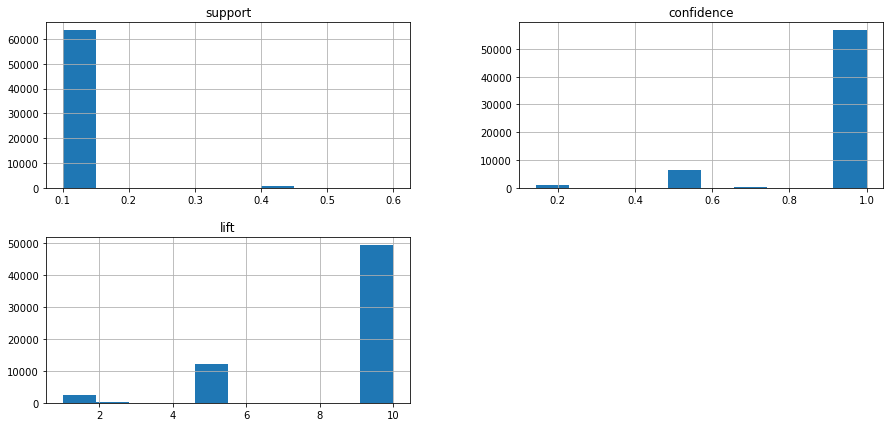

In [12]:
import matplotlib.pyplot as plt
rule[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [15]:
import matplotlib.pyplot as plt
plt.scatter(rule['support'],rules['confidence'])
plt.show()

NameError: name 'rules' is not defined

In [ ]:
rule.sort_values(by='lift',ascending=False)

In [ ]:
#book data set
book = pd.read_csv("book.csv")

In [ ]:
book.head()

In [ ]:
book['ChildBks'].value_counts()

In [ ]:
#apriori algorithm
boo=pd.get_dummies(book)
boo.head()

In [ ]:
frequent_itemsets = apriori(boo, min_support=0.1, use_colnames=True)
frequent_itemsets

In [ ]:
frequent_itemsets.info()

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

In [ ]:
rules.sort_values('lift')[0:20]

In [ ]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

In [ ]:
rules.sort_values(by='lift',ascending=False)